In [93]:
!pip install mediapipe opencv-python
!pip install FPDF

  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40727 sha256=6122ffad4186d1987c599cba0abf4cc48567cf226e1250549cb75ea11a93bc79
  Stored in directory: c:\users\nipuna munasinghe\appdata\local\pip\cache\wheels\b4\7f\00\f90ea7c44f8b921477205baa66a7aaf04be398f743ea946fd5
Successfully built FPDF


In [106]:
import cv2
import csv
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*100.0/np.pi)
    
    if angle > 180.0:
        angle = 360.0 - angle
        
    return angle

def motionLearn(video,tuteID,refTuteRep,uid):

    fieldnames = ['frame', 'Left Elbow','Right Elbow','Left Shoulder','Left Wrist','Left Hip','Left knee','Left Ankle','Right Shoulder','Right Wrist','Right Hip','Right knee','Right Ankle','Look Left','Look Right','Look Up/Down']
    rows = []
    numofrows = 10
    count = 0

    cap = cv2.VideoCapture(video)
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        if (cap.isOpened() == False):
            print("Cannot open video")
        else:
            print("Video Opened")

        while cap.isOpened():
            ret, frame = cap.read()

            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                results = pose.process(image)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


                try:
                    landmarks = results.pose_landmarks.landmark
                    
                    NOSE = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y,landmarks[mp_pose.PoseLandmark.NOSE.value].visibility]
                    LEFT_EYE_INNER = [landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER.value].y,landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER.value].visibility]
                    LEFT_EYE = [landmarks[mp_pose.PoseLandmark.LEFT_EYE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_EYE.value].visibility]
                    LEFT_EYE_OUTER = [landmarks[mp_pose.PoseLandmark.LEFT_EYE_OUTER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EYE_OUTER.value].y,landmarks[mp_pose.PoseLandmark.LEFT_EYE_OUTER.value].visibility]
                    RIGHT_EYE_INNER = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER.value].visibility]
                    RIGHT_EYE = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_EYE.value].visibility]
                    RIGHT_EYE_OUTER = [landmarks[mp_pose.PoseLandmark.RIGHT_EYE_OUTER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_OUTER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_EYE_OUTER.value].visibility]
                    LEFT_EAR = [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].visibility]
                    RIGHT_EAR = [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].visibility]
                    MOUTH_LEFT = [landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].y,landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].visibility]
                    MOUTH_RIGHT = [landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].y,landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].visibility]
                    LEFT_SHOULDER = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].visibility]
                    RIGHT_SHOULDER = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].visibility]
                    LEFT_ELBOW = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                    RIGHT_ELBOW = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].visibility]
                    LEFT_WRIST = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].visibility]
                    RIGHT_WRIST = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].visibility]
                    LEFT_PINKY = [landmarks[mp_pose.PoseLandmark.LEFT_PINKY.value].x,landmarks[mp_pose.PoseLandmark.LEFT_PINKY.value].y,landmarks[mp_pose.PoseLandmark.LEFT_PINKY.value].visibility]
                    RIGHT_PINKY = [landmarks[mp_pose.PoseLandmark.RIGHT_PINKY.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_PINKY.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_PINKY.value].visibility]
                    LEFT_INDEX = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].y,landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].visibility]
                    RIGHT_INDEX = [landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].visibility]
                    LEFT_THUMB = [landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].y,landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].visibility]
                    RIGHT_THUMB = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].visibility]
                    LEFT_HIP = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].visibility]
                    RIGHT_HIP = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].visibility]
                    LEFT_KNEE = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].visibility]
                    RIGHT_KNEE = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].visibility]
                    LEFT_ANKLE = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].visibility]
                    RIGHT_ANKLE = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].visibility]
                    LEFT_HEEL = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].visibility]
                    RIGHT_HEEL = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].visibility]
                    LEFT_FOOT_INDEX = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].visibility]
                    RIGHT_FOOT_INDEX = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].visibility]

                    col = {'frame':count,
                    'Left Elbow':calculate_angle(LEFT_SHOULDER,LEFT_ELBOW,LEFT_WRIST),
                    'Right Elbow':calculate_angle(RIGHT_SHOULDER,RIGHT_ELBOW,RIGHT_WRIST),
                    'Left Shoulder':calculate_angle(LEFT_HIP,LEFT_SHOULDER,LEFT_ELBOW),
                    'Left Wrist':calculate_angle(LEFT_ELBOW,LEFT_WRIST,LEFT_PINKY),
                    'Left Hip':calculate_angle(LEFT_KNEE,LEFT_HIP,LEFT_SHOULDER),
                    'Left knee':calculate_angle(LEFT_HIP,LEFT_KNEE,LEFT_ANKLE),
                    'Left Ankle':calculate_angle(LEFT_KNEE,LEFT_ANKLE,LEFT_FOOT_INDEX),
                    'Right Shoulder':calculate_angle(LEFT_HIP,LEFT_SHOULDER,LEFT_ELBOW),
                    'Right Wrist':calculate_angle(RIGHT_ELBOW,RIGHT_WRIST,RIGHT_PINKY),
                    'Right Hip':calculate_angle(RIGHT_KNEE,RIGHT_HIP,RIGHT_SHOULDER),
                    'Right knee':calculate_angle(RIGHT_HIP,RIGHT_KNEE,RIGHT_ANKLE),
                    'Right Ankle':calculate_angle(RIGHT_KNEE,RIGHT_ANKLE,RIGHT_FOOT_INDEX),
                    'Look Left':calculate_angle(LEFT_SHOULDER,NOSE,LEFT_EAR),
                    'Look Right':calculate_angle(RIGHT_SHOULDER,NOSE,RIGHT_EAR),
                    'Look Up/Down':calculate_angle(RIGHT_SHOULDER,NOSE,LEFT_SHOULDER)}
                    rows.append(col)
                    count += 1
                    
#                     angle = calculate_angle(LEFT_SHOULDER,LEFT_ELBOW,LEFT_WRIST)
#                     print(angle)

                    cv2.putText(image,str(angle),
                                tuple(np.multiply(LEFT_ELBOW,[640,480]).asType(int)),
                                0.5, (255,255,255), 2, cv2.LINE_AA
                               )

                except:
                    pass

                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                cv2.imshow('Motion Learn Training View', image)


                if cv2.waitKey(30) & 0xFF == ord('q'):
                    with open(tuteID+'.csv', 'w', encoding='UTF8', newline='') as f:
                        writer = csv.DictWriter(f, fieldnames=fieldnames)
                        writer.writeheader()
                        writer.writerows(rows)
                    break

            else :
                with open(tuteID+'.csv', 'w', encoding='UTF8', newline='') as f:
                        writer = csv.DictWriter(f, fieldnames=fieldnames)
                        writer.writeheader()
                        writer.writerows(rows)
                break
    
    cap.release()
    cv2.destroyAllWindows()
    
    df1 = pd.read_csv(refTuteRep+'.csv')
    df2 = pd.read_csv(tuteID+'.csv')

    df3 = (df1.merge(df2, how='outer'))

    df = df3.diff(periods=len(df1.axes[0]),axis=0).abs()
    df = df.drop(columns=['frame'])

    for number in range(len(df1.axes[0])):
        df = df.drop([number])

    df.loc['Accuracy']= 100-((df.sum(numeric_only=True, axis=0)/(180*count))*100)
    print(count)
    df.to_csv(uid+tuteID+'.csv')
    
    fig = plt.figure(figsize=(20,5))

    names1=['Left Elbow','Right Elbow','Left Shoulder','Left Wrist','Left Hip','Left knee','Left Ankle','Right Shoulder','Right Wrist','Right Hip','Right knee','Right Ankle']

    df1 = pd.read_csv(uid+tuteID+'.csv',index_col=0,skiprows=1,names=['count','LeftElbow','RightElbow','LeftShoulder','LeftWrist','LeftHip','Leftknee','LeftAnkle','RightShoulder','RightWrist','RightHip','Rightknee','RightAnkle','LookLeft','LookRight','LookUpDown'])
    print(df1.tail(1))
    df1 = df1.tail(1)
    
    

    df1['Overall'] = (df1.LeftElbow[0]+df1.RightElbow[0]+df1.LeftShoulder[0]+df1.LeftWrist[0]+df1.LeftHip[0]+df1.Leftknee[0]+df1.LeftAnkle[0]+df1.RightShoulder[0]+df1.RightWrist[0]+df1.RightHip[0]+df1.Rightknee[0]+df1.RightAnkle[0])/15
    scores=[df1.LeftElbow[0],df1.RightElbow[0],df1.LeftShoulder[0],df1.LeftWrist[0],df1.LeftHip[0],df1.Leftknee[0],df1.LeftAnkle[0],df1.RightShoulder[0],df1.RightWrist[0],df1.RightHip[0],df1.Rightknee[0],df1.RightAnkle[0]]
    positions=[0,1,2,3,4,5,6,7,8,9,10,11]

    plt.bar(positions,scores, width=0.3,facecolor='blue', alpha=0.62)

    plt.xticks(positions,names1)
    df1.to_csv(uid+tuteID+'final.csv')

    plt.savefig('fig1.png',orientation='landscape',transparent=True, bbox_inches=None, pad_inches=0)

    plt.show()
    
    pdf = FPDF(orientation = 'P', unit = 'mm', format = 'A4')
    pdf.add_page()
    #pdf.set_font('helvetica', 'bold', 10)
    pdf.set_text_color(255, 255, 255)
    pdf.image('fig1.png', x = 0, y = 0, w = 210)
    pdf.output('Automated PDF Report.pdf')


Video Opened
147
          LeftElbow  RightElbow  LeftShoulder  LeftWrist    LeftHip  \
count                                                                 
Accuracy   84.18933   78.609039     96.341256  92.817398  94.989675   

           Leftknee  LeftAnkle  RightShoulder  RightWrist   RightHip  \
count                                                                  
Accuracy  93.778653  83.391167      96.341256   95.506961  93.755641   

          Rightknee  RightAnkle   LookLeft  LookRight  LookUpDown  
count                                                              
Accuracy  85.720059   91.795742  94.531628  49.125797   90.016448  


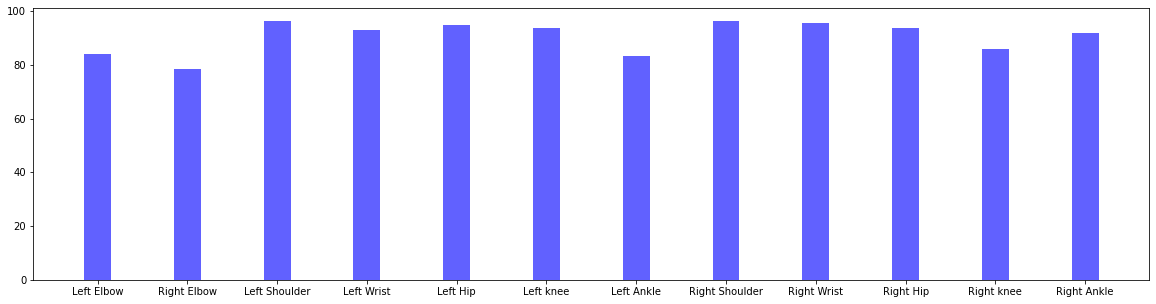

In [107]:
motionLearn('2.mp4','3','1','test3')